In [1]:
import sympy as sp
from sympy.physics import mechanics
import script as rt

from IPython.lib.display import IFrame

In [2]:
mechanics.init_vprinting()  # за да скрати печатењето на (t) кај променливите кои зависат од времето

### Задача 4.1

In [3]:
IFrame(src='https://drive.google.com/file/d/1FMA5dvcUOeE-2_5gqLgLsEYHECgOCBVF/preview', width='400', height='300')

Разгледуваме маса која се движи во еден правец. Ја дефинираме кинетичката и потенцијалната енергија и со помош на Лагранжовите равенки ја изразуваме динамиката на масата.

Променливите кои зависат од време ќе ги дефинираме со помош на функцијата `dynamicsymbols()`.

In [4]:
m, g = sp.symbols('m, g')
y = mechanics.dynamicsymbols('y')
y

y

In [5]:
vy = y.diff('t')
vy

ẏ

In [6]:
K = m * vy**2 / 2
K

   2
m⋅ẏ 
────
 2  

In [7]:
P = m * g * y
P

g⋅m⋅y

In [8]:
L = K - P
L

            2
         m⋅ẏ 
-g⋅m⋅y + ────
          2  

In [9]:
rt.lagrangian(L, [y])

[m⋅(g + ÿ)]

### Задача 4.2

In [10]:
IFrame(src='https://drive.google.com/file/d/1_9j9q4bF4BB_0oSeRXZ7XOPBNoJmJNT8/preview', width='400', height='300')

За да ја одредиме кинетичката енергија можеме да ги искористиме изразите за позиција на тежиштето и да побараме извод од тие изрази. Откако ќе ја пресметаме кинетичката енергија, ќе ја пресметаме и потенцијалната енергија. Тие заедно го сочинуваат Лагранжијанот кој ќе го искористиме за да го добиеме динамичкиот модел на раката.

In [11]:
m, g, l = sp.symbols('m, g, l')
theta = mechanics.dynamicsymbols('theta')
theta

θ

In [12]:
x = l * sp.cos(theta)
x

l⋅cos(θ)

In [13]:
y = l * sp.sin(theta)
y

l⋅sin(θ)

In [14]:
vx = x.diff('t')
vx

-l⋅sin(θ)⋅θ̇

In [15]:
vy = y.diff('t')
vy

l⋅cos(θ)⋅θ̇

In [16]:
K = m * (vx**2 + vy**2) / 2 
K = sp.simplify(K)
K

 2    2
l ⋅m⋅θ̇ 
───────
   2   

In [17]:
P = m * g * l * sp.sin(theta)
P

g⋅l⋅m⋅sin(θ)

In [18]:
L = K - P
L

                 2    2
                l ⋅m⋅θ̇ 
-g⋅l⋅m⋅sin(θ) + ───────
                   2   

In [19]:
rt.lagrangian(L, [theta])

[l⋅m⋅(g⋅cos(θ) + l⋅θ̈)]

### Задача 4.3

In [20]:
IFrame(src='https://drive.google.com/file/d/15_F9XjwiEexSqybHYunugaHBFVcYrvCt/preview', width='400', height='300')

Оваа роботска рака има два призматични зглоба. Кинетичката енергија на раката е збир од кинетичките енергии на нејзините два крака. За потенцијалната енергија важи истото.

In [21]:
m1, m2, g = sp.symbols('m1, m2, g')
d1, d2 = mechanics.dynamicsymbols('d1, d2')
vd1, vd2 = d1.diff('t'), d2.diff('t')

In [22]:
K1 = m1 * vd1**2 / 2
K1

     2
m₁⋅d₁̇ 
──────
  2   

In [23]:
K2 = m2 * (vd1**2 + vd2**2) / 2
K2

   ⎛  2     2⎞
m₂⋅⎝d₁̇  + d₂̇ ⎠
──────────────
      2       

In [24]:
K = K1 + K2
K

     2      ⎛  2     2⎞
m₁⋅d₁̇    m₂⋅⎝d₁̇  + d₂̇ ⎠
────── + ──────────────
  2            2       

In [25]:
P = m1 * g * d1 + m2 * g * d1
P

g⋅m₁⋅d₁ + g⋅m₂⋅d₁

In [26]:
L = K - P
L

                          2      ⎛  2     2⎞
                     m₁⋅d₁̇    m₂⋅⎝d₁̇  + d₂̇ ⎠
-g⋅m₁⋅d₁ - g⋅m₂⋅d₁ + ────── + ──────────────
                       2            2       

In [27]:
rt.lagrangian(L, [d1, d2])

⎡g⋅m₁ + g⋅m₂ + m₁⋅d₁̈ + m₂⋅d₁̈⎤
⎢                           ⎥
⎣           m₂⋅d₂̈           ⎦

### Задача 4.4

In [28]:
IFrame(src='https://drive.google.com/file/d/169d3reWy0sbrznCGPMDJuRle7qo6lAS1/preview', width='400', height='300')

Оваа задача се решава исто како задача 3, но сега има два ротациони зглобови.

In [29]:
m1, m2, g, l1, l2 = sp.symbols('m1, m2, g, l1, l2')
theta1, theta2 = mechanics.dynamicsymbols('theta1, theta2')
vtheta1, vtheta2 = theta1.diff('t'), theta2.diff('t')

In [30]:
K1 = m1 * l1**2 * vtheta1**2 / 2
K1

  2      2
l₁ ⋅m₁⋅θ₁̇ 
──────────
    2     

In [31]:
x2 = l1*sp.cos(theta1) + l2*sp.cos(theta1 + theta2)
y2 = l1*sp.sin(theta1) + l2*sp.sin(theta1 + theta2)
v2_squared = x2.diff('t')**2 + y2.diff('t')**2
K2 = m2 * v2_squared / 2
K2 = sp.simplify(K2)
K2

   ⎛  2   2                     2                             2   2       2   
m₂⋅⎝l₁ ⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + l₂ ⋅θ₁̇  + 2⋅l
──────────────────────────────────────────────────────────────────────────────
                                             2                                

        2   2⎞
₂ ⋅θ₁̇⋅θ₂̇ + l₂ ⋅θ₂̇ ⎠
──────────────
              

In [32]:
K = K1 + K2
K

  2      2      ⎛  2   2                     2                             2  
l₁ ⋅m₁⋅θ₁̇    m₂⋅⎝l₁ ⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + 
────────── + ─────────────────────────────────────────────────────────────────
    2                                                     2                   

 2       2           2   2⎞
l₂ ⋅θ₁̇  + 2⋅l₂ ⋅θ₁̇⋅θ₂̇ + l₂ ⋅θ₂̇ ⎠
───────────────────────────
                           

In [33]:
P1 = m1 * g * l1 * sp.sin(theta1)
P1

g⋅l₁⋅m₁⋅sin(θ₁)

In [34]:
P2 = m2 * g * l1 * sp.sin(theta1) + m2 * g * l2 * sp.sin(theta1 + theta2)
P2

g⋅l₁⋅m₂⋅sin(θ₁) + g⋅l₂⋅m₂⋅sin(θ₁ + θ₂)

In [35]:
P = P1 + P2
P

g⋅l₁⋅m₁⋅sin(θ₁) + g⋅l₁⋅m₂⋅sin(θ₁) + g⋅l₂⋅m₂⋅sin(θ₁ + θ₂)

In [36]:
L = K - P
L

                                                              2      2      ⎛ 
                                                            l₁ ⋅m₁⋅θ₁̇    m₂⋅⎝
-g⋅l₁⋅m₁⋅sin(θ₁) - g⋅l₁⋅m₂⋅sin(θ₁) - g⋅l₂⋅m₂⋅sin(θ₁ + θ₂) + ────────── + ─────
                                                                2             

 2   2                     2                             2   2       2        
l₁ ⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̇⋅θ₂̇ + l₂ ⋅θ₁̇  + 2⋅l₂ ⋅θ
──────────────────────────────────────────────────────────────────────────────
                                        2                                     

   2   2⎞
₁̇⋅θ₂̇ + l₂ ⋅θ₂̇ ⎠
─────────
         

In [37]:
rt.lagrangian(L, [theta1, theta2])

⎡                                                             2            ⎛  
⎢g⋅l₁⋅m₁⋅cos(θ₁) + g⋅l₁⋅m₂⋅cos(θ₁) + g⋅l₂⋅m₂⋅cos(θ₁ + θ₂) + l₁ ⋅m₁⋅θ₁̈ + m₂⋅⎝l
⎢                                                                             
⎢                                                              ⎛              
⎣                                                        l₂⋅m₂⋅⎝g⋅cos(θ₁ + θ₂)

2                                              2                              
₁ ⋅θ₁̈ - 2⋅l₁⋅l₂⋅sin(θ₂)⋅θ₁̇⋅θ₂̇ - l₁⋅l₂⋅sin(θ₂)⋅θ₂̇  + 2⋅l₁⋅l₂⋅cos(θ₂)⋅θ₁̈ + 
                                                                              
                2                                ⎞                            
 + l₁⋅sin(θ₂)⋅θ₁̇  + l₁⋅cos(θ₂)⋅θ₁̈ + l₂⋅θ₁̈ + l₂⋅θ₂̈⎠                        

               2        2   ⎞⎤
l₁⋅l₂⋅cos(θ₂)⋅θ₂̈ + l₂ ⋅θ₁̈ + l₂ ⋅θ₂̈⎠⎥
                             ⎥
                             ⎥
                                 ⎦

In [38]:
rt.dynamic_model_with_4_matrices(L, [theta1, theta2])

⎛⎡⎛  2        2                             2   ⎞                             
⎜⎢⎝l₁ ⋅m₁ + l₁ ⋅m₂ + 2⋅l₁⋅l₂⋅m₂⋅cos(θ₂) + l₂ ⋅m₂⎠⋅θ₁̈  l₂⋅m₂⋅(l₁⋅cos(θ₂) + l₂)
⎜⎢                                                                            
⎜⎢                                                              2             
⎝⎣            l₂⋅m₂⋅(l₁⋅cos(θ₂) + l₂)⋅θ₁̈                      l₂ ⋅m₂⋅θ₂̈     

  ⎤  ⎡                                          2⎤                            
⋅θ₂̈⎥  ⎢         0            -l₁⋅l₂⋅m₂⋅sin(θ₂)⋅θ₂̇ ⎥  ⎡-2⋅l₁⋅l₂⋅m₂⋅sin(θ₂)⋅θ₁
  ⎥, ⎢                                           ⎥, ⎢                         
  ⎥  ⎢                   2                       ⎥  ⎣            0            
    ⎦  ⎣l₁⋅l₂⋅m₂⋅sin(θ₂)⋅θ₁̇             0          ⎦                         

                                                           ⎞
̇⋅θ₂̇⎤  ⎡g⋅(l₁⋅m₁⋅cos(θ₁) + l₁⋅m₂⋅cos(θ₁) + l₂⋅m₂⋅cos(θ₁ + θ₂))⎤⎟
⎥, ⎢                                                      ⎥⎟
⎦  ⎣                

### Задача 4.5

In [39]:
IFrame(src='https://drive.google.com/file/d/1A7vSVYvuYOgmx2QFId8yTDx52oySyIYZ/preview', width='400', height='300')

Оваа задача бара да се исцрта векторот $g$ од претходната задача. Рачно го презапишуваме и користиме библиотека за исцртување.

In [40]:
gravity_vector = sp.Matrix([
    g * (m1 + m2) * l1 * sp.cos(theta1) + m2 * g * l1 * sp.cos(theta1 + theta2), 
    m2 * g * l1 * sp.cos(theta1 + theta2)])
gravity_vector

⎡g⋅l₁⋅m₂⋅cos(θ₁ + θ₂) + g⋅l₁⋅(m₁ + m₂)⋅cos(θ₁)⎤
⎢                                             ⎥
⎣            g⋅l₁⋅m₂⋅cos(θ₁ + θ₂)             ⎦

In [41]:
t = sp.symbols('t')
gravity_vector = gravity_vector.subs(l1, 2).subs(l2, 1).subs(m1, 5).subs(m2, 3)
gravity_vector = gravity_vector.subs(theta1, 4*sp.sin(t)).subs(theta2, 4*sp.sin(0.5*t)).subs(g, 9.81)
gravity_vector

⎡58.86⋅cos(4⋅sin(0.5⋅t) + 4⋅sin(t)) + 156.96⋅cos(4⋅sin(t))⎤
⎢                                                         ⎥
⎣           58.86⋅cos(4⋅sin(0.5⋅t) + 4⋅sin(t))            ⎦

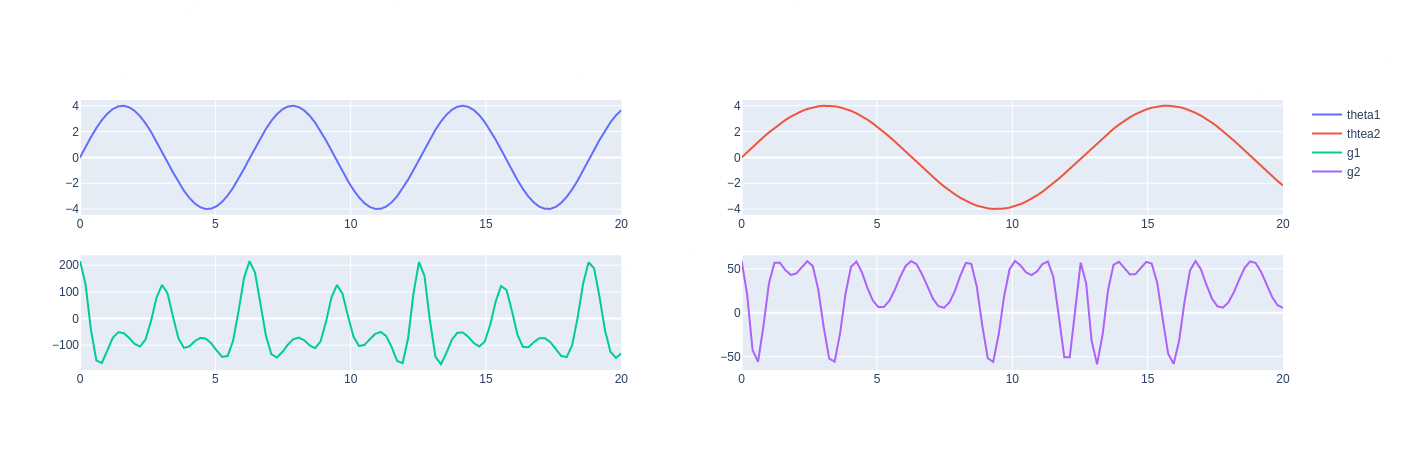

In [42]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

time = np.linspace(0, 20, 100)
equation_1 = sp.lambdify(t, 4*sp.sin(t))
equation_2 = sp.lambdify(t, 4*sp.sin(0.5*t))
equation_3 = sp.lambdify(t, gravity_vector[0])
equation_4 = sp.lambdify(t, gravity_vector[1])

fig = make_subplots(rows=2, cols=2)
fig.add_trace(go.Scatter(x=time, y=equation_1(time), name = 'theta1'), row=1, col=1)
fig.add_trace(go.Scatter(x=time, y=equation_2(time), name = 'thtea2'), row=1, col=2)
fig.add_trace(go.Scatter(x=time, y=equation_3(time), name = 'g1'), row=2, col=1)
fig.add_trace(go.Scatter(x=time, y=equation_4(time), name = 'g2'), row=2, col=2)
fig

### Задача 4.6

In [43]:
IFrame(src='https://drive.google.com/file/d/1s1dxtsl6ljDmm9s3VT7_aqHc6VmfdiDm/preview', width='400', height='300')

Се решава исто како и претходните задачи.

In [44]:
m, g = sp.symbols('m, g')

In [45]:
theta, r = mechanics.dynamicsymbols('theta, r')
vtheta = theta.diff('t')
vr = r.diff('t')

In [46]:
Krot = m * r**2 * vtheta**2 / 2
Krot

   2  2
m⋅r ⋅θ̇ 
───────
   2   

In [47]:
Klin = m * vr**2 / 2
Klin

   2
m⋅ṙ 
────
 2  

In [48]:
K = Krot + Klin 
K

   2  2      2
m⋅r ⋅θ̇    m⋅ṙ 
─────── + ────
   2       2  

In [49]:
P = m * g * r * sp.sin(theta)
P

g⋅m⋅r⋅sin(θ)

In [50]:
L = K - P
L

                   2  2      2
                m⋅r ⋅θ̇    m⋅ṙ 
-g⋅m⋅r⋅sin(θ) + ─────── + ────
                   2       2  

In [51]:
rt.lagrangian(L, [theta, r])

⎡m⋅(g⋅cos(θ) + r⋅θ̈ + 2⋅ṙ⋅θ̇)⋅r⎤
⎢                            ⎥
⎢    ⎛              2    ⎞   ⎥
⎣  m⋅⎝g⋅sin(θ) - r⋅θ̇  + r̈⎠   ⎦

In [52]:
rt.dynamic_model_with_3_matrices(L, [theta, r])

⎛⎡   2       ⎤  ⎡   0     2⋅m⋅r⋅ṙ⋅θ̇  0⎤                ⎞
⎜⎢m⋅r ⋅θ̈   0 ⎥  ⎢                     ⎥  ⎡g⋅m⋅r⋅cos(θ)⎤⎟
⎜⎢           ⎥, ⎢      2              ⎥, ⎢            ⎥⎟
⎝⎣  0     m⋅r̈⎦  ⎣-m⋅r⋅θ̇       0      0⎦  ⎣ g⋅m⋅sin(θ) ⎦⎠

In [53]:
gravity_vector = sp.Matrix([m * g * r * sp.cos(theta), m * g * sp.sin(theta)])
gravity_vector

⎡g⋅m⋅r⋅cos(θ)⎤
⎢            ⎥
⎣ g⋅m⋅sin(θ) ⎦

In [54]:
gravity_vector = gravity_vector.subs(l, 1).subs(m, 1).subs(r, 0.5).subs(g, 9.81)
gravity_vector

⎡4.905⋅cos(θ)⎤
⎢            ⎥
⎣9.81⋅sin(θ) ⎦

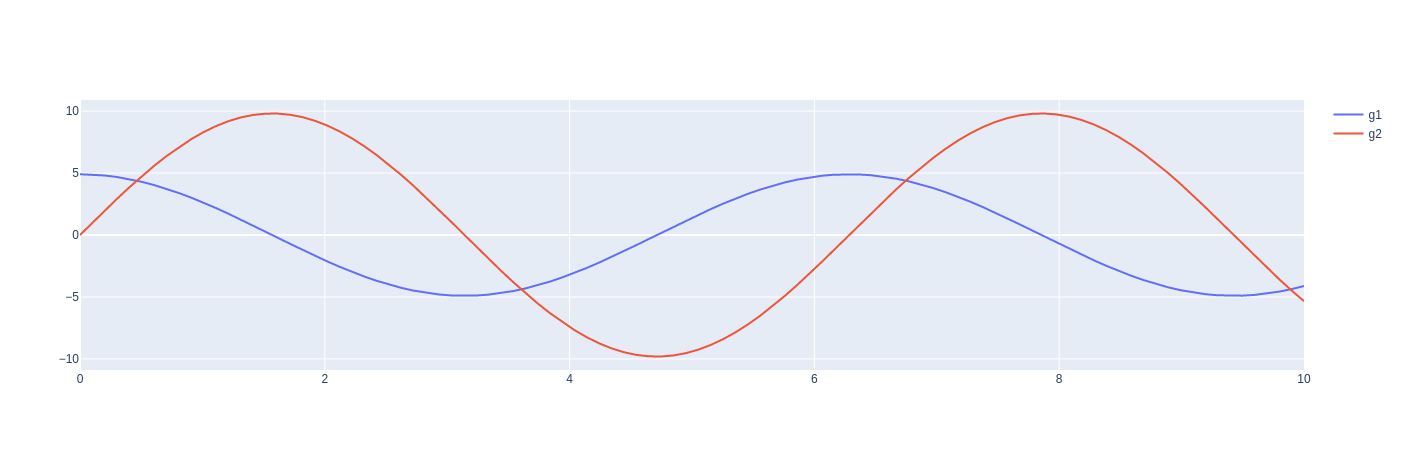

In [55]:
import numpy as np
import plotly.graph_objects as go

time = np.linspace(0, 10, 100)
equation_3 = sp.lambdify(theta, gravity_vector[0])
equation_4 = sp.lambdify(theta, gravity_vector[1])
scatter_1 = go.Scatter(x=time, y=equation_3(time), name = 'g1')
scatter_2 = go.Scatter(x=time, y=equation_4(time), name = 'g2')
fig = go.Figure([scatter_1, scatter_2])
fig

### Задача 4.7

Овој модел имплементирајте го вие.

### Задача 4.8

In [56]:
IFrame(src='https://drive.google.com/file/d/19ohsxEGc2JVhyI4k5vgOzL7lpIQtoDNc/preview', width='400', height='300')

За да ја решиме оваа задача, добиениот модел ќе го претставиме како модел во просторот на состојби.

In [57]:
vd1, vd2 = d1.diff('t'), d2.diff('t')
tau1, tau2, m1, m2 = sp.symbols('tau1, tau2, m1, m2')
tau1, tau2

(τ₁, τ₂)

In [58]:
vstate = sp.Matrix([vd1, (tau1-(m1+m2)*g)/(m1+m2), vd2, tau2/m2])
vstate

⎡       d₁̇        ⎤
⎢                 ⎥
⎢-g⋅(m₁ + m₂) + τ₁⎥
⎢─────────────────⎥
⎢     m₁ + m₂     ⎥
⎢                 ⎥
⎢       d₂̇        ⎥
⎢                 ⎥
⎢       τ₂        ⎥
⎢       ──        ⎥
⎣       m₂        ⎦

Потоа брзините и забрзувањата ќе ги изразиме да бидат нула за да можеме да ги пресметаме рамнотежните положби.

In [59]:
vstate.subs(vd1, 0).subs(vd2, 0)

⎡        0        ⎤
⎢                 ⎥
⎢-g⋅(m₁ + m₂) + τ₁⎥
⎢─────────────────⎥
⎢     m₁ + m₂     ⎥
⎢                 ⎥
⎢        0        ⎥
⎢                 ⎥
⎢       τ₂        ⎥
⎢       ──        ⎥
⎣       m₂        ⎦

На крајот со библиотеката ги пресметуваме силите кои треба да ги генерираат зглобовите за раката да мирува.

In [60]:
sp.solveset(vstate[1], tau1)

{g⋅(m₁ + m₂)}

In [61]:
sp.solveset(vstate[3], tau2)

{0}

### Задача 4.9

Се решава исто како и претходните задачи.

In [62]:
m1, m2, m3, g = sp.symbols('m1, m2, m3, g')
d1, d2, d3 = mechanics.dynamicsymbols('d1, d2, d3')
vd1, vd2, vd3 = d1.diff('t'), d2.diff('t'), d3.diff('t')

In [63]:
K = m1 * vd1**2 / 2  +  m2 * (vd1**2 + vd2**2) / 2  +  m3 * (vd1**2 + vd2**2 + vd3**2) / 2
K

     2      ⎛  2     2⎞      ⎛  2     2     2⎞
m₁⋅d₁̇    m₂⋅⎝d₁̇  + d₂̇ ⎠   m₃⋅⎝d₁̇  + d₂̇  + d₃̇ ⎠
────── + ────────────── + ────────────────────
  2            2                   2          

In [64]:
P = (m1 + m2 + m3) * g * d1
P

g⋅(m₁ + m₂ + m₃)⋅d₁

In [65]:
L = K - P
rt.lagrangian(L, [d1, d2, d3])

⎡g⋅(m₁ + m₂ + m₃) + m₁⋅d₁̈ + m₂⋅d₁̈ + m₃⋅d₁̈⎤
⎢                                        ⎥
⎢              (m₂ + m₃)⋅d₂̈              ⎥
⎢                                        ⎥
⎣                 m₃⋅d₃̈                  ⎦

Во вториот дел од задачата се бараат рамнотежните точки, а нив ќе ги најдеме исто како во претходната задача.

In [66]:
f1, f2, f3 = sp.symbols('f1, f2, f3')
f1, f2, f3

(f₁, f₂, f₃)

In [67]:
vstate = sp.Matrix([vd1, (f1-(m1+m2+m3)*g)/(m1+m2+m3), vd2, f2/(m2+m3), vd3, f3/m3])
vstate

⎡         d₁̇          ⎤
⎢                     ⎥
⎢f₁ - g⋅(m₁ + m₂ + m₃)⎥
⎢─────────────────────⎥
⎢     m₁ + m₂ + m₃    ⎥
⎢                     ⎥
⎢         d₂̇          ⎥
⎢                     ⎥
⎢          f₂         ⎥
⎢       ───────       ⎥
⎢       m₂ + m₃       ⎥
⎢                     ⎥
⎢         d₃̇          ⎥
⎢                     ⎥
⎢         f₃          ⎥
⎢         ──          ⎥
⎣         m₃          ⎦

In [68]:
vstate.subs(vd1, 0).subs(vd2, 0).subs(vd3, 0)

⎡          0          ⎤
⎢                     ⎥
⎢f₁ - g⋅(m₁ + m₂ + m₃)⎥
⎢─────────────────────⎥
⎢     m₁ + m₂ + m₃    ⎥
⎢                     ⎥
⎢          0          ⎥
⎢                     ⎥
⎢          f₂         ⎥
⎢       ───────       ⎥
⎢       m₂ + m₃       ⎥
⎢                     ⎥
⎢          0          ⎥
⎢                     ⎥
⎢         f₃          ⎥
⎢         ──          ⎥
⎣         m₃          ⎦

In [69]:
sp.solveset(vstate[1], f1)

{g⋅(m₁ + m₂ + m₃)}

In [70]:
sp.solveset(vstate[3], f2)

{0}

In [71]:
sp.solveset(vstate[5], f3)

{0}

### Задача 4.10

Се решава рачно.